### Using yolo ultralytics .pt model

In [ ]:
#yolo v8 is created by ultralytics team
#we can pip install or git clone repo and use that, read on docs of ultralytic
! pip install ultralytics

In [ ]:
!yolo checks

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/107.7 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                None

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.1+cu121>=1.8.0
torchvision         ✅ 0.17.1+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
#Detection model
det_model = YOLO('yolov8n.pt')

#Instance model
inst_model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 75.8MB/s]


100%|██████████| 6.73M/6.73M [00:00<00:00, 82.1MB/s]


In [ ]:
# Perform object detection on an image using the model
img = '/content/yoloImage.jpeg'
detection_results = det_model.predict(img) #we can give list of images also
instance_results = inst_model.predict(img)


image 1/1 /content/yoloImage.jpeg: 448x640 5 persons, 2 cars, 1 truck, 1 traffic light, 2 handbags, 505.0ms
Speed: 20.3ms preprocess, 505.0ms inference, 6020.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/yoloImage.jpeg: 448x640 6 persons, 2 cars, 1 truck, 4 handbags, 760.0ms
Speed: 4.3ms preprocess, 760.0ms inference, 96.5ms postprocess per image at shape (1, 3, 448, 640)


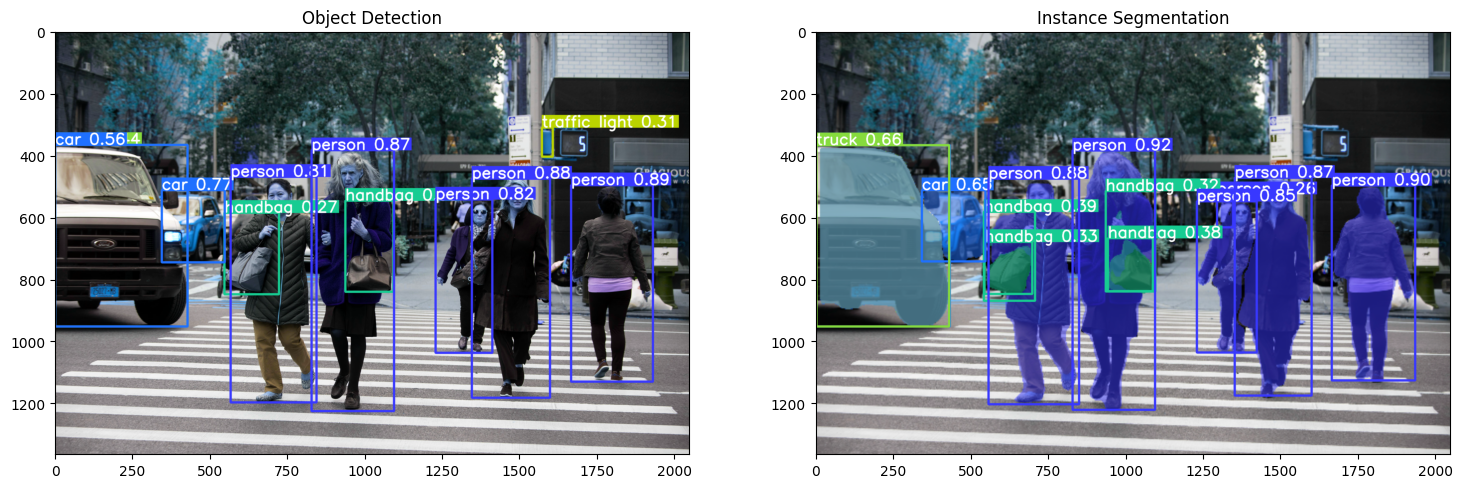

In [ ]:
detection_result_array = detection_results[0].plot() #first image we are seeing
instance_result_array = instance_results[0].plot()
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Object Detection")
ax1.imshow(detection_result_array)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Instance Segmentation")
ax2.imshow(instance_result_array)

In [ ]:
#we can see in the segmentation that it not giving all the pixels in bounding box, instead give only proper pixels needs

In [ ]:
#Number of bounding boxes (objects) detected in the image
result = instance_results[0]
len(result.boxes)

13

In [ ]:
#BBOX coordinates, class ID, and probability for a specific box.
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print(result.names)

Object type: 0.0
Coordinates: [827.9562377929688, 385.6494140625, 1093.3509521484375, 1222.6165771484375]
Probability: 0.9196863174438477
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59:

### Custom training yolo .pt using Roboflow

We can arrange data in this type of format , image and its
corresponding text file that tell annotation and by writing
data.yaml we tell yolo

In [ ]:
#fine tuning it

#we can use cli and sdk's for interacting with yolo
#sdk is pythonic way of using yolo, in this import yolo, we create instance of model and do things

In [ ]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [ ]:
from IPython import display
display.clear_output()

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
#using CLI we do like this and above one was using sdk

!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source= '/content/yoloImage.jpeg'
#task is to detect and we predict here using yolov8 and source is roboflow dataset

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/yoloImage.jpeg: 448x640 5 persons, 2 cars, 1 truck, 1 traffic light, 2 handbags, 261.8ms
Speed: 17.9ms preprocess, 261.8ms inference, 2886.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


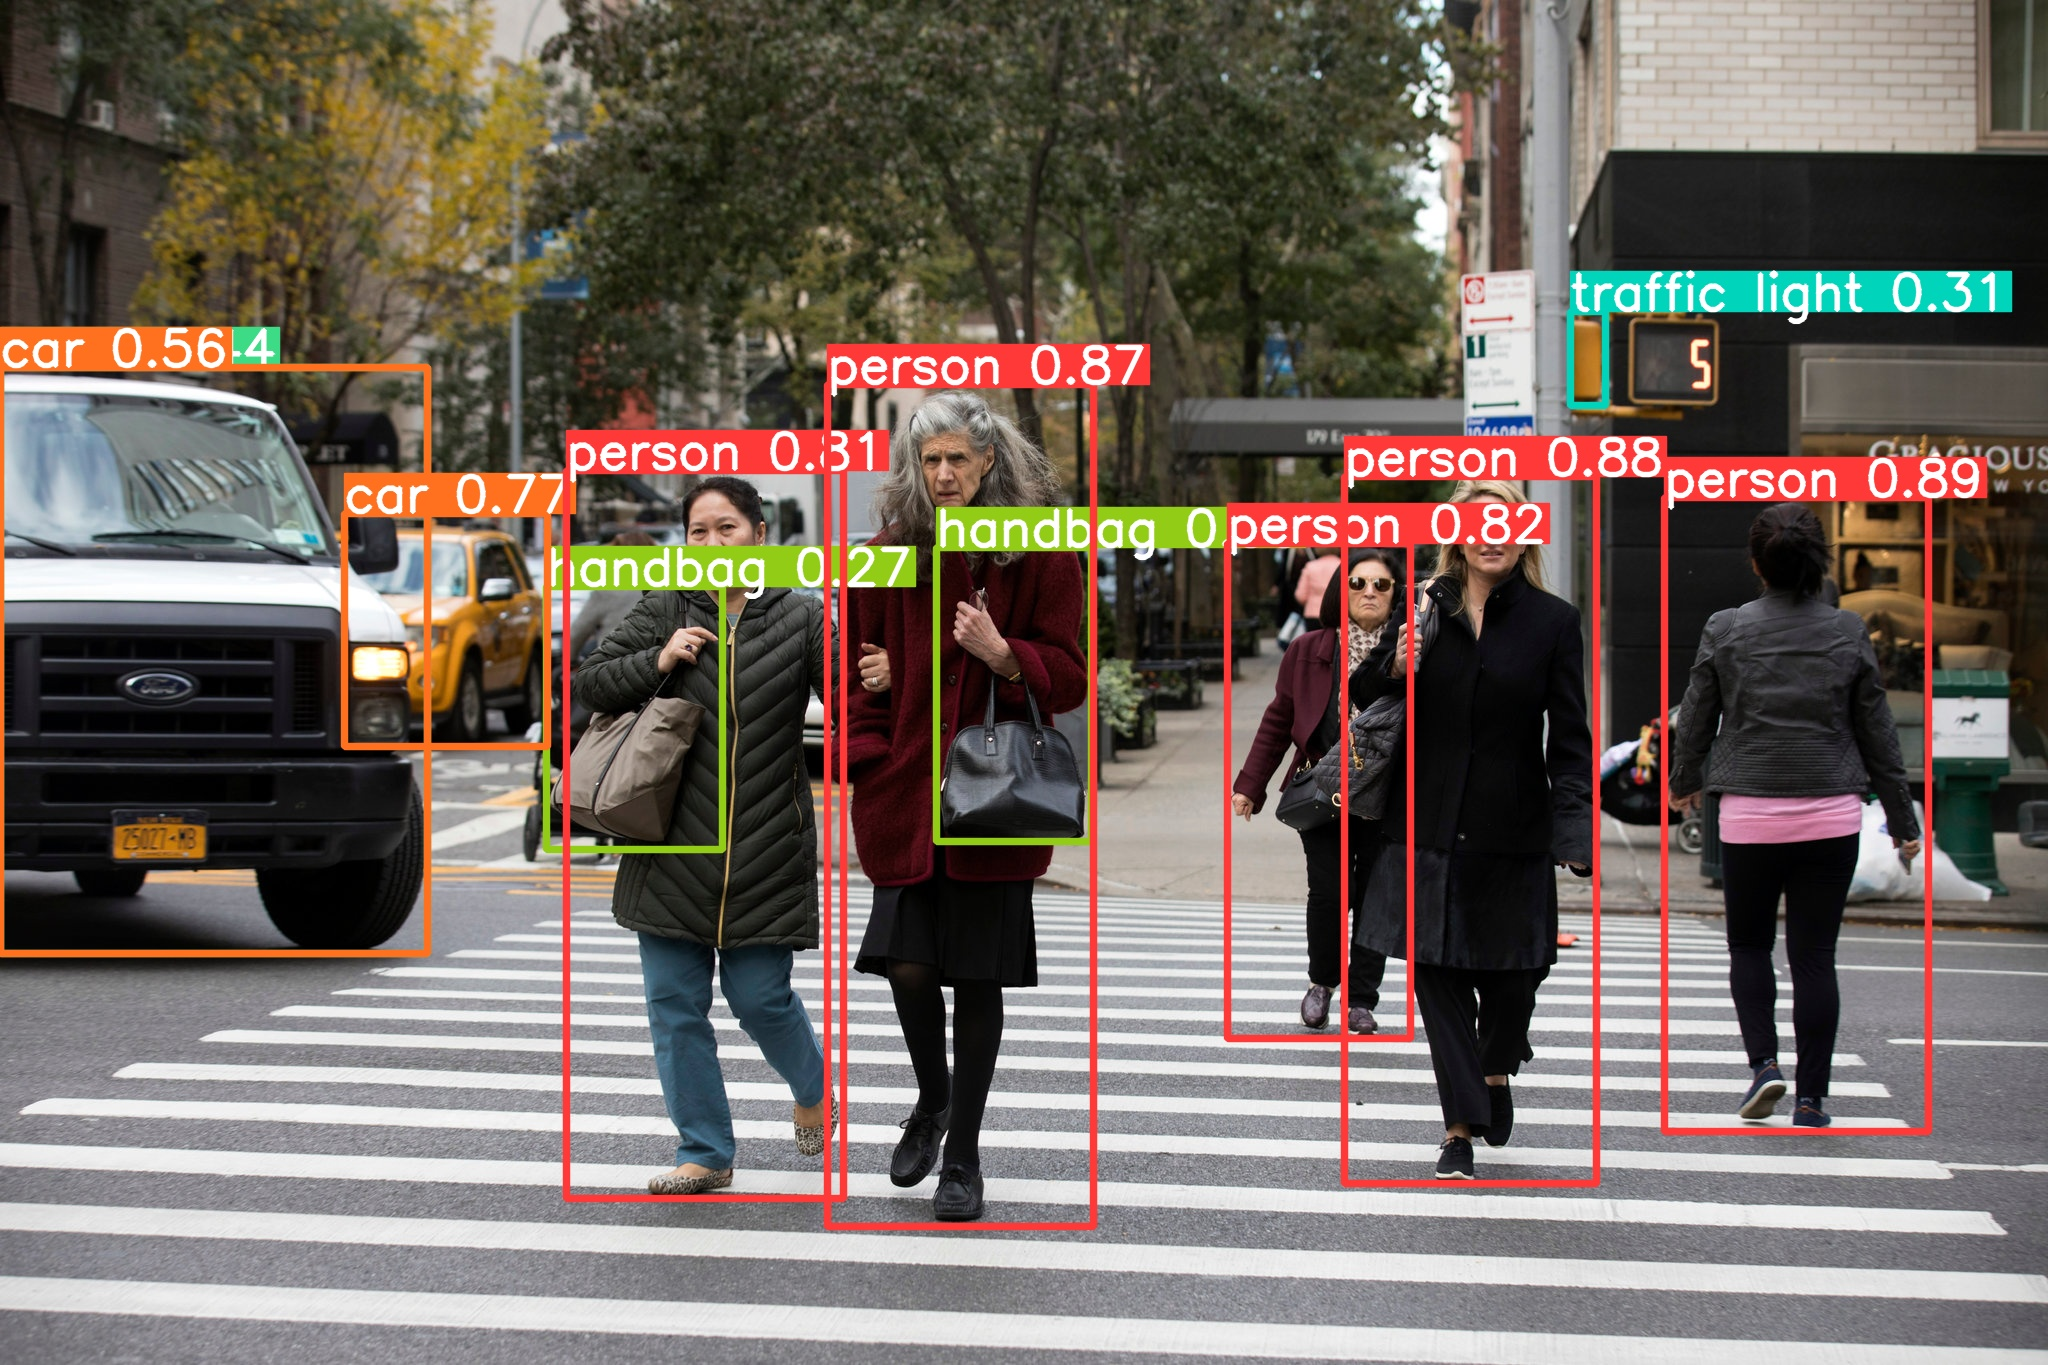

In [ ]:
Image (filename= 'runs/detect/predict/yoloImage.jpeg', height=600)

In [ ]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xnn49xjpAW7ks4MYGSQ3")
project = rf.workspace("daniyalkhan").project("person-detection-knfip")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.2, to fix: `pip install ultralytics==8.0.196`


In [ ]:
#Custom Training

! yolo task=detect mode=train model=yolov8s.pt data= {dataset.location}/data.yaml epochs=3 imgsz=640

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/person-detection-1/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

In [ ]:
#model trained weights stored as best.pt or last.pt in weights


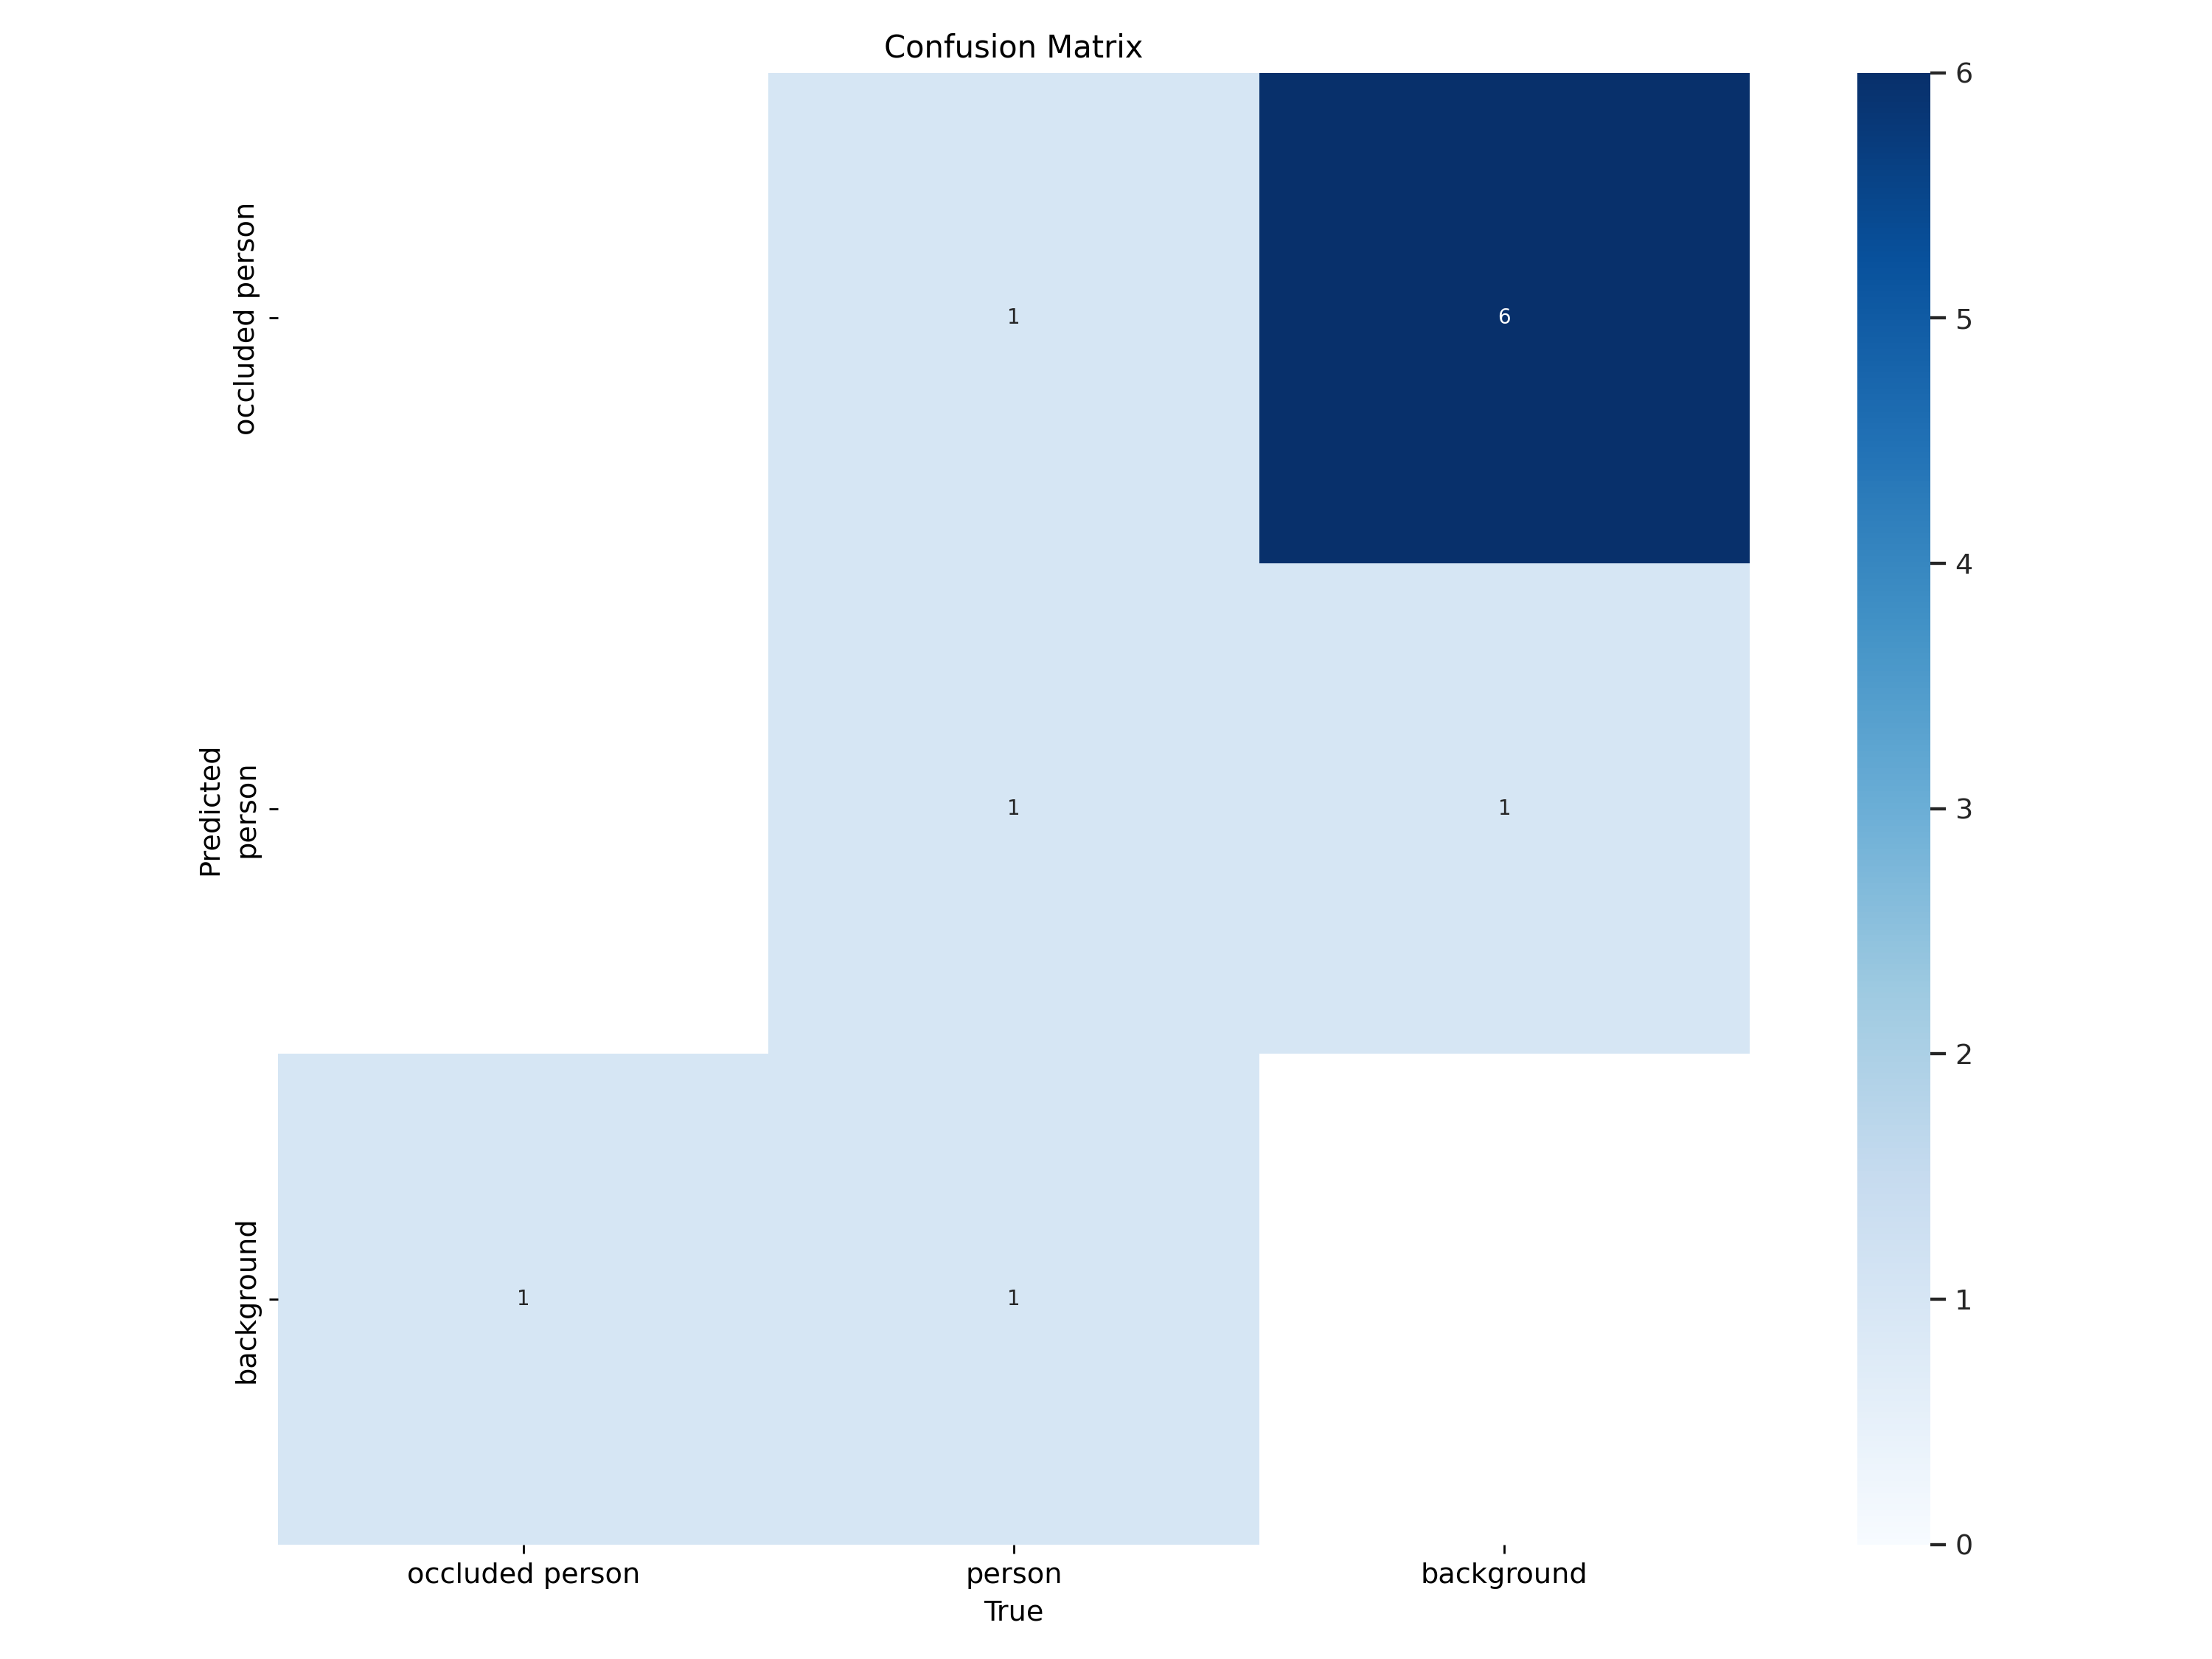

In [ ]:
Image(filename='/content/runs/detect/train2/confusion_matrix.png', width=600)

In [ ]:
#for inference

#source can accept a directory of images, individual images, video files,
#and also a device's webcam port

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/last.pt conf=0.25 source= '/content/person-detection-1/valid/images'

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/2 /content/person-detection-1/valid/images/FudanPed00015_png.rf.4f7504904fc415b88598d01c7fdb2ec3.jpg: 640x640 2 occluded persons, 1 person, 4188.6ms
image 2/2 /content/person-detection-1/valid/images/FudanPed00017_png.rf.6fbaf70cce406de089c47210deb41f90.jpg: 640x640 5 occluded persons, 1 person, 1545.3ms
Speed: 20.2ms preprocess, 2866.9ms inference, 3068.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
det_model = YOLO('/content/runs/detect/train2/weights/last.pt')

In [ ]:
img = '/content/yoloImage.jpeg'
detection_results = det_model.predict(img)


image 1/1 /content/yoloImage.jpeg: 448x640 8 occluded persons, 446.3ms
Speed: 4.6ms preprocess, 446.3ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


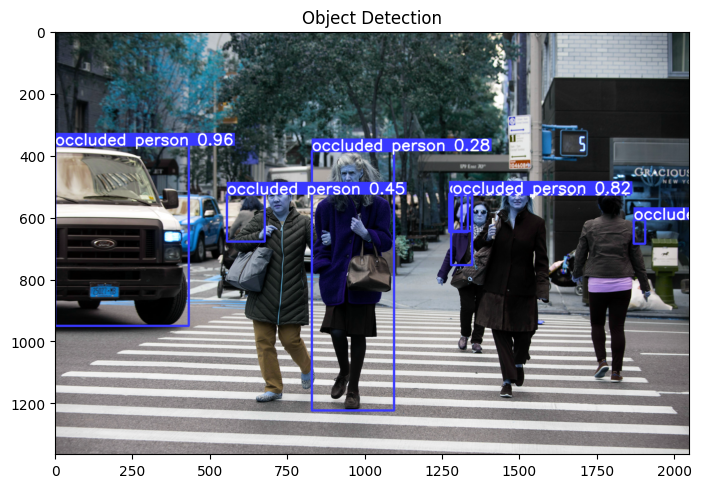

In [ ]:
detection_result_array = detection_results[0].plot()
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Object Detection")
ax1.imshow(detection_result_array)

In [ ]:
result = detection_results[0]
len(result.boxes)

8

In [ ]:
#BBOX coordinates, class ID, and probability for a specific box.
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print(result.names)

Object type: 0.0
Coordinates: [0.991259753704071, 369.02716064453125, 431.7613830566406, 951.60400390625]
Probability: 0.9608855843544006
{0: 'occluded person', 1: 'person'}


### Using Tensorflow

In [1]:
# https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/

In [2]:
#These were trained using the DarkNet code base on the MSCOCO dataset
#https://pjreddie.com/media/files/yolov3.weights

In [3]:
# we need to define a Keras model that has the right number and type of layers to match
# the downloaded model weights. The model architecture is called a “DarkNet” and was
# originally loosely based on the VGG-16 model


In [12]:
import tensorflow as tf
from tensorflow import keras
def _conv_block(inp, convs, skip=True):
    x = inp
    count = 0

    for conv in convs:
        if count == (len(convs) - 2) and skip:
            skip_connection = x
        count += 1

        if conv['stride'] > 1: x = keras.layers.ZeroPadding2D(((1,0),(1,0)))(x) # peculiar padding as darknet prefer left and top
        x = keras.layers.Conv2D(conv['filter'],
                   conv['kernel'],
                   strides=conv['stride'],
                   padding='valid' if conv['stride'] > 1 else 'same', # peculiar padding as darknet prefer left and top
                   name='conv_' + str(conv['layer_idx']),
                   use_bias=False if conv['bnorm'] else True)(x)
        if conv['bnorm']: x = keras.layers.BatchNormalization(epsilon=0.001, name='bnorm_' + str(conv['layer_idx']))(x)
        if conv['leaky']: x = keras.layers.LeakyReLU(alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)

    return keras.layers.Add()([skip_connection, x]) if skip else x

def make_yolov3_model():
    input_image = keras.layers.Input(shape=(None, None, 3))

    # Layer  0 => 4
    x = _conv_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
                                  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
                                  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
                                  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])

    # Layer  5 => 8
    x = _conv_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
                        {'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])

    # Layer  9 => 11
    x = _conv_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])

    # Layer 12 => 15
    x = _conv_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
                        {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
                        {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])

    # Layer 16 => 36
    for i in range(7):
        x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
                            {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])

    skip_36 = x

    # Layer 37 => 40
    x = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])

    # Layer 41 => 61
    for i in range(7):
        x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
                            {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])

    skip_61 = x

    # Layer 62 => 65
    x = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])

    # Layer 66 => 74
    for i in range(3):
        x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
                            {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])

    # Layer 75 => 79
    x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)

    # Layer 80 => 82
    yolo_82 = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
                              {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)

    # Layer 83 => 86
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
    x = keras.layers.UpSampling2D(2)(x)
    x = keras.layers.Concatenate()([x, skip_61])

    # Layer 87 => 91
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)

    # Layer 92 => 94
    yolo_94 = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
                              {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)

    # Layer 95 => 98
    x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)
    x = keras.layers.UpSampling2D(2)(x)
    x = keras.layers.Concatenate()([x, skip_36])

    # Layer 99 => 106
    yolo_106 = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
                               {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)

    model = keras.Model(input_image, [yolo_82, yolo_94, yolo_106])
    return model


In [13]:
model = make_yolov3_model()

In [14]:
# Next, we need to load the model weights. The model weights are stored in whatever format that
# was used by DarkNet. Rather than trying to decode the file manually, we can use the WeightReader
# class provided in the script.
# To use the WeightReader, it is instantiated with the path to our weights file
#  (e.g. ‘yolov3.weights‘). This will parse the file and load the model weights into
#  memory in a format that we can set into our Keras model.
import struct
import numpy as np
class WeightReader:
    def __init__(self, weight_file):
        with open(weight_file, 'rb') as w_f:
            major,    = struct.unpack('i', w_f.read(4))
            minor,    = struct.unpack('i', w_f.read(4))
            revision, = struct.unpack('i', w_f.read(4))

            if (major*10 + minor) >= 2 and major < 1000 and minor < 1000:
                w_f.read(8)
            else:
                w_f.read(4)

            transpose = (major > 1000) or (minor > 1000)

            binary = w_f.read()

        self.offset = 0
        self.all_weights = np.frombuffer(binary, dtype='float32')

    def read_bytes(self, size):
        self.offset = self.offset + size
        return self.all_weights[self.offset-size:self.offset]

    def load_weights(self, model):
        for i in range(106):
            try:
                conv_layer = model.get_layer('conv_' + str(i))
                print("loading weights of convolution #" + str(i))

                if i not in [81, 93, 105]:
                    norm_layer = model.get_layer('bnorm_' + str(i))

                    size = np.prod(norm_layer.get_weights()[0].shape)

                    beta  = self.read_bytes(size) # bias
                    gamma = self.read_bytes(size) # scale
                    mean  = self.read_bytes(size) # mean
                    var   = self.read_bytes(size) # variance

                    weights = norm_layer.set_weights([gamma, beta, mean, var])

                if len(conv_layer.get_weights()) > 1:
                    bias   = self.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
                    kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))

                    kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    conv_layer.set_weights([kernel, bias])
                else:
                    kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
                    kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    conv_layer.set_weights([kernel])
            except ValueError:
                print("no convolution #" + str(i))

    def reset(self):
        self.offset = 0

In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [18]:
!kaggle datasets download -d danukhan/yolov3-weights-darknet

 96% 212M/220M [00:03<00:00, 94.5MB/s]
100% 220M/220M [00:03<00:00, 69.7MB/s]


In [19]:
import zipfile
zip_ref = zipfile.ZipFile('/content/yolov3-weights-darknet.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
weight_reader = WeightReader('/content/yolov3.weights')

In [21]:
# We can then call the load_weights() function of the WeightReader instance, passing
# in our defined Keras model to set the weights into the layers.
weight_reader.load_weights(model)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [22]:
# We can save this model to a Keras compatible .h5 model file ready for later use.
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
#predictions

In [27]:
model = keras.models.load_model('model.h5')

In [28]:
# The model expects inputs to be color images with the square shape of 416×416 pixels.
# We will want to show the original photo again later, which means we will need
# to scale the bounding boxes of all detected objects from the square shape back to the
# original shape. As such, we can load the image and retrieve the original shape.

from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# load and prepare an image
def load_image_pixels(filename, shape):
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size
    # load the image with the required size
    image = load_img(filename, target_size=shape)
    # convert to numpy array
    image = img_to_array(image)
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0
    # add a dimension so that we have one sample
    image = np.expand_dims(image, 0)
    return image, width, height

In [30]:
input_w, input_h = 416, 416
photo_filename = 'zebra.jpg'
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))


yhat = model.predict(image)
# summarize the shape of the list of arrays
print([a.shape for a in yhat])

# These arrays predict both the bounding boxes and class labels but are encoded

1/1 [==============================] - 3s 3s/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


In [62]:
yhat[0][0].shape

(13, 13, 255)

In [42]:
class BoundBox:
    def __init__(self, xmin, ymin, xmax, ymax, objness = None, classes = None):
        self.xmin = xmin
        self.ymin = ymin
        self.xmax = xmax
        self.ymax = ymax

        self.objness = objness
        self.classes = classes

        self.label = -1
        self.score = -1

    def get_label(self):
        if self.label == -1:
            self.label = np.argmax(self.classes)

        return self.label

    def get_score(self):
        if self.score == -1:
            self.score = self.classes[self.get_label()]

        return self.score

In [43]:
# The output of the model is, in fact, encoded candidate bounding boxes from
# three different grid sizes, and the boxes are defined the context of anchor boxes,
# carefully chosen based on an analysis of the size of objects in the MSCOCO dataset.

# decode_netout() that will take each one of the NumPy arrays, one at a time, and decode the candidate
# bounding boxes and class predictions. Further, any bounding boxes that don’t confidently describe
# an object (e.g. all class probabilities are below a threshold) are ignored. We will use a probability of
# 60% or 0.6. The function returns a list of BoundBox instances that define the corners of each bounding box
# in the context of the input image shape and class probabilities

def _sigmoid(x):
    return 1. / (1. + np.exp(-x))

def decode_netout(netout, anchors, obj_thresh, net_h, net_w):
    grid_h, grid_w = netout.shape[:2]
    nb_box = 3
    netout = netout.reshape((grid_h, grid_w, nb_box, -1))
    nb_class = netout.shape[-1] - 5

    boxes = []

    netout[..., :2]  = _sigmoid(netout[..., :2])
    netout[..., 4:]  = _sigmoid(netout[..., 4:])
    netout[..., 5:]  = netout[..., 4][..., np.newaxis] * netout[..., 5:]
    netout[..., 5:] *= netout[..., 5:] > obj_thresh

    for i in range(grid_h*grid_w):
      row = i / grid_w
      col = i % grid_w
      for b in range(nb_box):
        # 4th element is objectness score
        objectness = netout[int(row)][int(col)][b][4]
        if(objectness.all() <= obj_thresh): continue
        # first 4 elements are x, y, w, and h
        x, y, w, h = netout[int(row)][int(col)][b][:4]
        x = (col + x) / grid_w # center position, unit: image width
        y = (row + y) / grid_h # center position, unit: image height
        w = anchors[2 * b + 0] * np.exp(w) / net_w # unit: image width
        h = anchors[2 * b + 1] * np.exp(h) / net_h # unit: image height
        # last elements are class probabilities
        classes = netout[int(row)][col][b][5:]
        box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, objectness, classes)
        boxes.append(box)
    return boxes

In [44]:
# define the anchors
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
# define the probability threshold for detected objects
class_threshold = 0.6
boxes = list()
for i in range(len(yhat)):
 # decode the output of the network
 boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)

In [45]:
# Next, the bounding boxes can be stretched back into the shape of the original image.
# This is helpful as it means that later we can plot the original image and draw the bounding boxes,
#  hopefully detecting real objects.

# The experiencor script provides the correct_yolo_boxes() function to perform this translation of
# bounding box coordinates, taking the list of bounding boxes, the original shape of our loaded photograph,
# and the shape of the input to the network as arguments. The coordinates of the bounding boxes are updated directly

def correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w):
    if (float(net_w)/image_w) < (float(net_h)/image_h):
        new_w = net_w
        new_h = (image_h*net_w)/image_w
    else:
        new_h = net_w
        new_w = (image_w*net_h)/image_h

    for i in range(len(boxes)):
        x_offset, x_scale = (net_w - new_w)/2./net_w, float(new_w)/net_w
        y_offset, y_scale = (net_h - new_h)/2./net_h, float(new_h)/net_h

        boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)
        boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)
        boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)
        boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)

In [46]:
# The model has predicted a lot of candidate bounding boxes, and most of the boxes will be
# referring to the same objects. The list of bounding boxes can be filtered and those boxes
# that overlap and refer to the same object can be merged. We can define the amount of overlap
# as a configuration parameter, in this case, 50% or 0.5. This filtering of bounding box regions
# is generally referred to as non-maximal suppression and is a required post-processing step.

# The experiencor script provides this via the do_nms() function that takes the list of bounding boxes
# and a threshold parameter. Rather than purging the overlapping boxes, their predicted probability
# for their overlapping class is cleared. This allows the boxes to remain and be used if they also
# detect another object type.


def _interval_overlap(interval_a, interval_b):
    x1, x2 = interval_a
    x3, x4 = interval_b

    if x3 < x1:
        if x4 < x1:
            return 0
        else:
            return min(x2,x4) - x1
    else:
        if x2 < x3:
             return 0
        else:
            return min(x2,x4) - x3

def bbox_iou(box1, box2):
    intersect_w = _interval_overlap([box1.xmin, box1.xmax], [box2.xmin, box2.xmax])
    intersect_h = _interval_overlap([box1.ymin, box1.ymax], [box2.ymin, box2.ymax])

    intersect = intersect_w * intersect_h

    w1, h1 = box1.xmax-box1.xmin, box1.ymax-box1.ymin
    w2, h2 = box2.xmax-box2.xmin, box2.ymax-box2.ymin

    union = w1*h1 + w2*h2 - intersect

    return float(intersect) / union

def do_nms(boxes, nms_thresh):
    if len(boxes) > 0:
        nb_class = len(boxes[0].classes)
    else:
        return

    for c in range(nb_class):
        sorted_indices = np.argsort([-box.classes[c] for box in boxes])

        for i in range(len(sorted_indices)):
            index_i = sorted_indices[i]

            if boxes[index_i].classes[c] == 0: continue

            for j in range(i+1, len(sorted_indices)):
                index_j = sorted_indices[j]

                if bbox_iou(boxes[index_i], boxes[index_j]) >= nms_thresh:
                    boxes[index_j].classes[c] = 0

In [47]:
# This will leave us with the same number of boxes, but only very few of interest.
# We can retrieve just those boxes that strongly predict the presence of an object: that
# is are more than 60% confident. This can be achieved by enumerating over all boxes and checking
# the class prediction values. We can then look up the corresponding class label for the box and
# add it to the list. Each box must be considered for each class label, just in case the same box
# strongly predicts more than one object.

# We can develop a get_boxes() function that does this and takes the list of boxes, known labels,
# and our classification threshold as arguments and returns parallel lists of boxes, labels, and scores.

def get_boxes(boxes, labels, thresh):
  v_boxes, v_labels, v_scores = list(), list(), list()
  # enumerate all boxes
  for box in boxes:
  # enumerate all possible labels
    for i in range(len(labels)):
      # check if the threshold for this label is high enough
      if box.classes[i] > thresh:
        v_boxes.append(box)
        v_labels.append(labels[i])
        v_scores.append(box.classes[i]*100)
        # don't break, many labels may trigger for one box
  return v_boxes, v_labels, v_scores

In [48]:
# define the labels
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
    "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
    "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
    "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
    "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
    "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
    "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
    "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
    "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]
# get the details of the detected objects
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

In [50]:
#Now that we have those few boxes of strongly predicted objects, we can summarize them.
for i in range(len(v_boxes)):
    print(v_labels[i], v_scores[i])

In [54]:
# We can also plot our original photograph and draw the bounding box around each detected object.
# This can be achieved by retrieving the coordinates from each bounding box and creating a Rectangle object.

# We can also draw a string with the class label and confidence.

# The draw_boxes() function below implements this, taking the filename of the original
# photograph and the parallel lists of bounding boxes, labels and scores, and creates a plot showing all detected objects.

from matplotlib import pyplot
from matplotlib.patches import Rectangle

def draw_boxes(filename, v_boxes, v_labels, v_scores):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for i in range(len(v_boxes)):
		box = v_boxes[i]
		# get coordinates
		y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
		# calculate width and height of the box
		width, height = x2 - x1, y2 - y1
		# create the shape
		rect = Rectangle((x1, y1), width, height, fill=False, color='white')
		# draw the box
		ax.add_patch(rect)
		# draw text and score in top left corner
		label = "%s (%.3f)" % (v_labels[i], v_scores[i])
		pyplot.text(x1, y1, label, color='white')
	# show the plot
	pyplot.show()

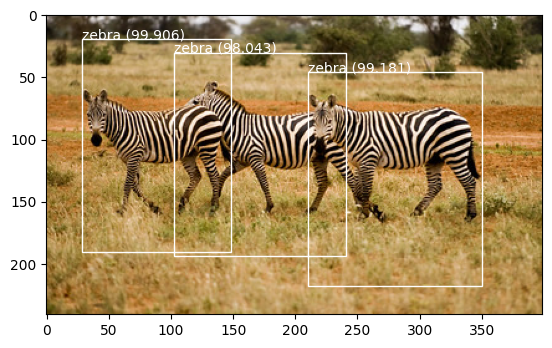

In [55]:
draw_boxes(photo_filename, v_boxes, v_labels, v_scores)

1/1 [==============================] - 4s 4s/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
zebra 99.90560412406921
zebra 98.04280996322632
zebra 99.18136596679688


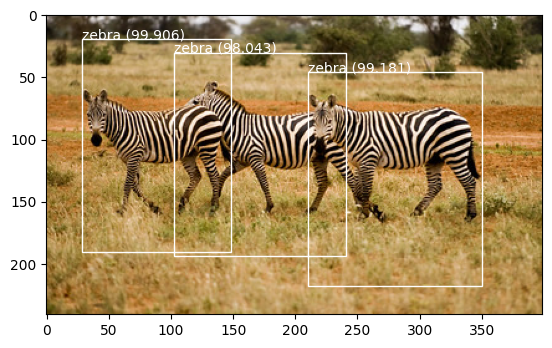

In [56]:
# load yolov3 model
model = load_model('model.h5')
# define the expected input shape for the model
input_w, input_h = 416, 416
# define our new photo
photo_filename = 'zebra.jpg'
# load and prepare image
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))
# make prediction
yhat = model.predict(image)
# summarize the shape of the list of arrays
print([a.shape for a in yhat])
# define the anchors
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
# define the probability threshold for detected objects
class_threshold = 0.6
boxes = list()
for i in range(len(yhat)):
	# decode the output of the network
	boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)
# correct the sizes of the bounding boxes for the shape of the image
correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)
# suppress non-maximal boxes
do_nms(boxes, 0.5)
# define the labels
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
	"boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
	"bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
	"backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
	"sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
	"tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
	"apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
	"chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
	"remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
	"book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]
# get the details of the detected objects
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)
# summarize what we found
for i in range(len(v_boxes)):
	print(v_labels[i], v_scores[i])
# draw what we found
draw_boxes(photo_filename, v_boxes, v_labels, v_scores)

In [57]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv_0 (Conv2D)             (None, None, None, 32)       864       ['input_5[0][0]']             
                                                                                                  
 bnorm_0 (BatchNormalizatio  (None, None, None, 32)       128       ['conv_0[0][0]']              
 n)                                                                                               
                                                                                                  
 leaky_0 (LeakyReLU)         (None, None, None, 32)       0         ['bnorm_0[0][0]']         

In [63]:
#for training on custom dataset this keras model use https://github.com/experiencor/keras-yolo3 and https://github.com/experiencor/keras-yolo2
#and youtube vids n medium
#then trained keras yolo can be combined with other models to do things

### Trying YOLO on tf datasets(NOT DONE)

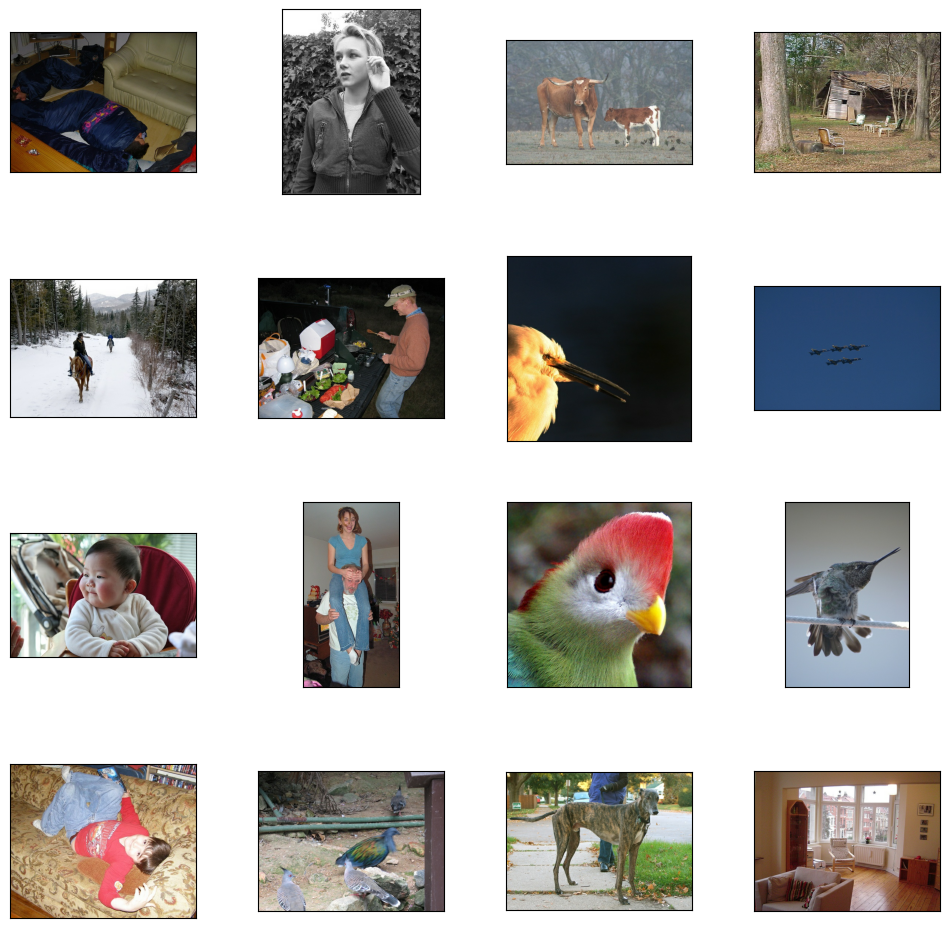

In [ ]:
# #tensorflow flic dataset
# import tensorflow as tf
# from tensorflow import keras
# from keras import layers
# import tensorflow_datasets as tfds
# import matplotlib.pyplot as plt

# (ds_train, ds_test), ds_info = tfds. load (
#     "voc", #it is name that is in catelog of link above
#     split=["train", "test"],
#     shuffle_files=True, #tf datasets store something in records in multiple files, for easy stream, loading simultaneously while training
#                         # so it is for shuffles dataponits in batch so not sequential
#     as_supervised=False, #it return tuple (image,label) otherwise it returns dict
#     with_info=True, #for getting info

# )

# fig = tfds.show_examples (ds_train, ds_info, rows=4, cols=4)

# def normalize_image(image, label):
#   return tf.cast(image, tf.float32)/255.0, label

# def normalize_image1(data):
#   data['image']=tf.image.resize(data['image'], [224,224])
#   return tf.cast(data['image'], tf.float32)/255.0, data['objects']

# AUTOTUNE=tf.data.experimental.AUTOTUNE #tf allow us to give this to set automatically
# BATCH_SIZE=64

# ds_train=ds_train.map(normalize_image1, num_parallel_calls=AUTOTUNE) # in normalize function these is no sequence so
# #process can be done paralelly
# ds_train= ds_train.cache() #it keep next data in memory so it will be fast
# ds_train=ds_train.shuffle(ds_info.splits['train'].num_examples) #we can give 1000 so it will see 1000 datat points but
# #it depends on records in a file so take from that
# ds_train=ds_train.batch(BATCH_SIZE)
# ds_train=ds_train.prefetch(AUTOTUNE) #it keeps 64 examples ready when running on gpu the current one

# ds_test=ds_test.map(normalize_image1, num_parallel_calls=AUTOTUNE)
# ds_test=ds_test.batch(128)
# ds_test=ds_test.prefetch(AUTOTUNE)